In [1]:
import numpy as np 
import pandas as pd
import os
for dirname, _, filenames in os.walk('/allRagas'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import matplotlib.pyplot as plt
%matplotlib inline
import librosa
import librosa.display
import IPython.display as ipd
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import Adam
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from keras.callbacks import ModelCheckpoint
from datetime import datetime
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, LSTM, BatchNormalization
from sklearn.metrics import confusion_matrix, f1_score, classification_report
from scipy.io import wavfile as wav
from keras.models import load_model
import tensorflow as tf
print(tf.__version__)

2.17.0


In [2]:
audio1= "allRagas/Karaharapriya_0001.wav"

In [3]:
data,sr1=librosa.load(audio1)
ipd.Audio(audio1)

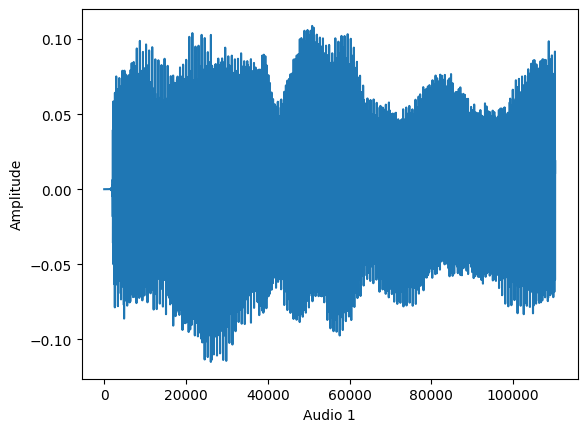

In [4]:
plt.plot(data)
plt.xlabel('Audio 1')
plt.ylabel('Amplitude')
plt.show()

In [5]:
wavesr2, wave_audio=wav.read(audio1)

In [6]:
wavesr2

44100

In [7]:
wave_audio

array([[   0,    0],
       [   0,    0],
       [   0,    0],
       ...,
       [1083, -195],
       [ 938, -259],
       [ 852, -291]], dtype=int16)

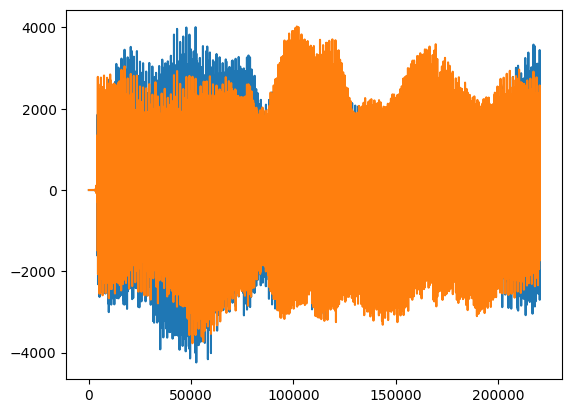

In [8]:
plt.plot(wave_audio)
plt.show()

In [ ]:
folder_path = ''
file_names = [file for file in os.listdir(folder_path) if file.endswith('.wav')]

raga_name = [name[:-9] for name in file_names]

In [10]:
print(file_names[:5])
print(raga_name[:5])

['kalyani_0001.wav', 'kalyani_0002.wav', 'kalyani_0003.wav', 'kalyani_0004.wav', 'kalyani_0005.wav']
['kalyani', 'kalyani', 'kalyani', 'kalyani', 'kalyani']


In [11]:
def features_extractor(file_or_audio, sample_rate=None):
    if isinstance(file_or_audio, str):
        audio, sample_rate = librosa.load(file_or_audio)
    else:
        audio = file_or_audio

    mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs.T, axis=0)
    return mfccs_scaled_features

In [12]:
extracted_features = []
for file_name in file_names:
    file_path = os.path.join(folder_path, file_name)
    features = features_extractor(file_path)
    file_name = file_name.title()
    extracted_features.append([features, file_name[:-9]])
print(extracted_features)

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [13]:
features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
features_df.head()

,feature,class
0,"[-213.26077, 33.135113, 2.3023686, 3.8473237, ...",Kalyani
1,"[-201.8888, 84.75534, -33.242752, 5.5584683, -...",Kalyani
2,"[-222.60681, 87.465324, -33.947823, 6.864622, ...",Kalyani
3,"[-215.5661, 67.80187, -20.391146, 22.167274, -...",Kalyani
4,"[-253.9299, 111.61942, -17.701475, 13.53499, -...",Kalyani


In [14]:
X=np.array(features_df['feature'].tolist())
y=np.array(features_df['class'].tolist())
le=LabelEncoder()
ti=le.fit_transform(y)
y=to_categorical(ti)

In [15]:
y.shape

(26775, 11)

In [16]:
originallabels=le.classes_
print("Original labels: ", originallabels)
print("Encoded labels: ", np.unique(ti))

Original labels:  ['Kalyani' 'Karaharapriya' 'Keeravani' 'Latangi' 'Mayamazhavakawzhai'
 'Ramapriya' 'Sakkaravaham' 'Sangaraparanam' 'Sarasangi' 'Shanmugapriya'
 'Thodi']
Encoded labels:  [ 0  1  2  3  4  5  6  7  8  9 10]


In [17]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=127)

In [18]:
X_train.shape

(21420, 40)

In [19]:
y_train.shape

(21420, 11)

In [20]:
X_train.shape

(21420, 40)

In [21]:
y_test.shape

(5355, 11)

In [22]:
num_labels = y.shape[1]
print(num_labels)

11


In [23]:
X_train_flat = np.array([x.flatten() for x in X_train])
X_test_flat = np.array([x.flatten() for x in X_train])


In [24]:
num_classes = 11
model = Sequential()
model.add(Conv1D(64, kernel_size=5, activation='relu', input_shape=(X_train_flat.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(BatchNormalization())
model.add(Conv1D(128, kernel_size=5, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(BatchNormalization())
model.add(LSTM(128, return_sequences=True))
model.add(LSTM(64))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

C:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [25]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 36, 64)              │             384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 18, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 18, 64)              │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 14, 128)             │          41,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ (None, 7, 128)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 7, 128)              │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 7, 128)              │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │          16,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 11)                  │           2,827 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 242,699 (948.04 KB)

 Trainable params: 242,315 (946.54 KB)

 Non-trainable params: 384 (1.50 KB)

In [26]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='Adam')

In [27]:
num_classes = 11
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

num_epochs = 30
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='saved_model.keras', verbose=1, save_best_only=True)

start = datetime.now()
model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, 
          validation_data=(X_test, y_test), verbose=1, callbacks=[checkpointer])

duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/30
669/670 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4421 - loss: 1.6498
Epoch 1: val_loss improved from inf to 0.47906, saving model to saved_model.keras
670/670 ━━━━━━━━━━━━━━━━━━━━ 13s 12ms/step - accuracy: 0.4426 - loss: 1.6483 - val_accuracy: 0.8484 - val_loss: 0.4791
Epoch 2/30
666/670 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8750 - loss: 0.4079
Epoch 2: val_loss improved from 0.47906 to 0.23361, saving model to saved_model.keras
670/670 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.8751 - loss: 0.4076 - val_accuracy: 0.9281 - val_loss: 0.2336
Epoch 3/30
666/670 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9402 - loss: 0.1990
Epoch 3: val_loss improved from 0.23361 to 0.17744, saving model to saved_model.keras
670/670 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.9402 - loss: 0.1990 - val_accuracy: 0.9425 - val_loss: 0.1774
Epoch 4/30
670/670 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9533 - loss: 0.1493
Epoch 4: val_loss did not improve from 0.17744


In [28]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(f"test set accuracy: {test_accuracy[1] * 100}%")

train_accuracy=model.evaluate(X_train,y_train,verbose=0)
print(f"train set accuracy: {train_accuracy[1] * 100}%")

test set accuracy: 96.95611596107483%
train set accuracy: 99.57982897758484%


In [29]:
saved_model = load_model('saved_model.keras')
np.save('label_encoder_classes.npy', le.classes_)

In [30]:
y_pred = saved_model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)
conf_matrix = confusion_matrix(y_true, y_pred_classes)
f1 = f1_score(y_true, y_pred_classes, average='weighted')
print("Confusion Matrix:")
print(conf_matrix)

print("\nF1 Score:")
print(f1)

print("\nClassification Report:")
print(classification_report(y_true, y_pred_classes, target_names=originallabels))

168/168 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
Confusion Matrix:
[[249   0   3   0   0   0   0   0   0   1   0]
 [  0 647   0   1   0   3   3   0   2   1   4]
 [  4   5 893   3   2   7   0   1   2   3   0]
 [  0   1   0 385   0   9   0   0   5   2   0]
 [  2   0   0   1 326   4   0   0   0   3   1]
 [  0   1   0   0   0 432   1   0   0   1   1]
 [  2   3   0   2   0   1 229   1   2   1   0]
 [  0   1   1   0   0   0   0 365   1   2   0]
 [  1   2   1   3   0   5   1   0 468   1   1]
 [  2   1   0   0   4   7   0   2   9 635   2]
 [  6   2   1   1   2   2   0   4   5   2 565]]

F1 Score:
0.9700216999474703

Classification Report:
                    precision    recall  f1-score   support

           Kalyani       0.94      0.98      0.96       253
     Karaharapriya       0.98      0.98      0.98       661
         Keeravani       0.99      0.97      0.98       920
           Latangi       0.97      0.96      0.96       402
Mayamazhavakawzhai       0.98      0.97      0.97       337
        

In [ ]:
file =""
x,sr1 = librosa.load(file)
ipd.Audio(x,rate=sr1)

In [32]:
prediction_feature = features_extractor(file)
prediction_feature = prediction_feature.reshape(1,-1)
predicted_probabilities = model.predict(prediction_feature)
predicted_class_label = np.argmax(predicted_probabilities)
predicted_class_label = np.array([predicted_class_label])
prediction_class = le.inverse_transform(predicted_class_label)
print("Predicted class:", prediction_class[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step
Predicted class: Kalyani
